#About the Data
The information about the sectors and the counts of firms are listed respectively as Irrigation (114), Public Health (77), Buildings and Roads (82), Forest (70), Corporate (47), Animal Husbandry (95), Communication (1), Electrical (4), Land (5), Science and Technology (3), Tourism (1), Fisheries (41), Industries (37), Agriculture (200)

#Data Description
Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc. After in-depth interviews with the auditors, important risk factors are evaluated and their probability of existence is calculated from the present and past records.

 

Some of the columns/features are:

* Sector_score: sector score of the firm

* LOCATION_ID: location id of the firm

* score_X: different types of score values

* risk_X: different types of risk levels

* Inherent_Risk: the risk posed by an error or omission in a financial statement due to a factor other than a failure of internal control.

* CONTROL_RISK: Control Risk is the risk of a material misstatement in the financial statements arising due to absence or failure in the operation of relevant controls of the entity.

* Detection_Risk: Detection Risk is the risk that the auditors fail to detect a material misstatement in the financial statements.

* Audit_Risk: Audit risk (AR) refers to the risk that an auditor may issue an unqualified report due to the auditor's failure to detect material misstatement either due to error or fraud. This risk is composed of Inherent risk (IR), Control risk (CR), and Detection risk (DR)

    Audit risk can be calculated as:

    AR = IR × CR × DR

* Money_Value: Value for money of an audit

Target

* Risk: Whether the firm is fraudulent or not. The target value

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/training_set_label.csv")
test_df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/testing_set_label.csv')

In [3]:
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,8,1.13,0.4,0.452,0.00,0.2,0.000,1.13,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,1.852,0.4,0.5,0.3704,0
1,1.85,13,8.25,0.6,4.950,1.59,0.4,0.636,9.84,5.0,0.2,1.0,0.02,0.2,0.004,2,0.2,0.4,0,0.2,0.0,3.0,6.990,0.4,0.5,1.3980,1
2,2.72,19,2.13,0.6,1.278,0.59,0.2,0.118,2.72,5.0,0.2,1.0,0.76,0.2,0.152,2,0.2,0.4,0,0.2,0.0,2.4,2.948,0.4,0.5,0.5896,0
3,59.85,21,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,1.884,0.8,0.5,0.7536,0
4,2.72,4,1.33,0.4,0.532,0.35,0.2,0.070,1.68,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,2.002,0.4,0.5,0.4004,0


In [4]:
df.tail()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
538,1.99,19,3.02,0.6,1.812,0.0000,0.2,0.0000,3.0200,5.0,0.2,1.0,0.00,0.2,0.000,6,0.2,1.2,0,0.2,0.0,2.8,4.0120,1.2,0.5,2.40720,1
539,1.85,16,3.67,0.6,2.202,0.1800,0.2,0.0360,3.8500,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.4,3.6380,0.4,0.5,0.72760,0
540,55.57,13,0.31,0.2,0.062,0.0015,0.2,0.0003,0.3115,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.4623,0.4,0.5,0.29246,0
541,1.99,25,0.53,0.2,0.106,0.0000,0.2,0.0000,0.5300,5.0,0.2,1.0,2.33,0.2,0.466,2,0.2,0.4,0,0.2,0.0,2.0,1.9720,0.4,0.5,0.39440,0
542,2.72,9,0.00,0.2,0.000,0.0000,0.2,0.0000,0.0000,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.4000,0.4,0.5,0.28000,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    543 non-null    float64
 1   LOCATION_ID     543 non-null    object 
 2   PARA_A          543 non-null    float64
 3   Score_A         543 non-null    float64
 4   Risk_A          543 non-null    float64
 5   PARA_B          543 non-null    float64
 6   Score_B         543 non-null    float64
 7   Risk_B          543 non-null    float64
 8   TOTAL           543 non-null    float64
 9   numbers         543 non-null    float64
 10  Score_B.1       543 non-null    float64
 11  Risk_C          543 non-null    float64
 12  Money_Value     543 non-null    float64
 13  Score_MV        543 non-null    float64
 14  Risk_D          543 non-null    float64
 15  District_Loss   543 non-null    int64  
 16  PROB            543 non-null    float64
 17  RiSk_E          543 non-null    flo

No missing values

In [6]:
df.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000,543.0,543.000000,543.000000
mean,20.464236,2.142874,0.346593,1.162339,9.480252,0.316022,5.538131,11.615851,5.069982,0.223941,1.155617,12.441131,0.288398,7.237898,2.500921,0.205525,0.519337,0.086556,0.212891,0.044199,2.699448,15.663949,0.563536,0.5,5.054067,0.392265
std,24.441277,4.200770,0.173158,2.558306,22.445359,0.171442,13.509523,24.721307,0.281144,0.081145,0.549035,59.090138,0.156512,35.485800,1.214723,0.034986,0.302349,0.534651,0.058735,0.309682,0.853460,43.195795,0.444976,0.0,13.394958,0.488705
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.255000,0.200000,0.051000,0.000000,0.200000,0.000000,0.590000,5.000000,0.200000,1.000000,0.000000,0.200000,0.000000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.582000,0.400000,0.5,0.316400,0.000000
50%,3.890000,0.840000,0.200000,0.168000,0.460000,0.200000,0.092000,1.370000,5.000000,0.200000,1.000000,0.100000,0.200000,0.020000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.556000,0.000000
75%,55.570000,2.400000,0.600000,1.440000,4.500000,0.400000,2.184000,7.660000,5.000000,0.200000,1.000000,5.455000,0.400000,2.182000,2.000000,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,9.959000,0.400000,0.5,3.032800,1.000000
max,59.850000,57.030000,0.600000,34.218000,144.390000,0.600000,86.634000,191.360000,9.000000,0.600000,5.400000,935.030000,0.600000,561.018000,6.000000,0.600000,2.400000,9.000000,0.600000,5.400000,5.200000,622.838000,5.800000,0.5,149.817600,1.000000


### Visualize Data

In [8]:
df.corr()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.272986,-0.426114,-0.273315,-0.257629,-0.236479,-0.252162,-0.280079,-0.156982,-0.182010,-0.176615,-0.127725,-0.331896,-0.125281,-0.094948,-0.090523,-0.117416,-0.107672,-0.142941,-0.096343,-0.351501,-0.201829,-0.146831,NaN,-0.208192,-0.399229
PARA_A,-0.272986,1.000000,0.577962,0.998691,0.474939,0.433341,0.474203,0.601012,0.152888,0.160067,0.158201,0.433996,0.324973,0.432216,0.076046,0.006395,0.063560,0.069140,0.147956,0.050730,0.489710,0.565418,0.078493,NaN,0.464311,0.423718
Score_A,-0.426114,0.577962,1.000000,0.587702,0.473553,0.582012,0.470457,0.527734,0.236091,0.275002,0.264185,0.209239,0.490405,0.205699,0.067776,0.060978,0.074033,0.125755,0.234719,0.101905,0.724156,0.355752,0.121224,NaN,0.370496,0.618667
Risk_A,-0.273315,0.998691,0.587702,1.000000,0.480368,0.438423,0.479507,0.605707,0.154994,0.163537,0.161218,0.432934,0.330126,0.431095,0.076847,0.006847,0.064436,0.072703,0.152159,0.054003,0.496775,0.566306,0.081366,NaN,0.466194,0.432073
PARA_B,-0.257629,0.474939,0.473553,0.480368,1.000000,0.661852,0.999652,0.988764,0.374153,0.387859,0.388774,0.306387,0.595826,0.304589,-0.042652,0.131538,-0.007795,0.127858,0.250115,0.097142,0.694487,0.596853,0.062309,NaN,0.571220,0.499301
Score_B,-0.236479,0.433341,0.582012,0.438423,0.661852,1.000000,0.661983,0.674754,0.298234,0.346378,0.334322,0.233326,0.574210,0.229155,-0.027978,0.089799,-0.008480,0.135807,0.254292,0.108961,0.909086,0.426126,0.070070,NaN,0.404626,0.631723
Risk_B,-0.252162,0.474203,0.470457,0.479507,0.999652,0.661983,1.000000,0.988319,0.372425,0.385969,0.386825,0.305885,0.591672,0.304128,-0.041623,0.132883,-0.006347,0.125224,0.249272,0.094458,0.692961,0.596488,0.061425,NaN,0.571338,0.494416
TOTAL,-0.280079,0.601012,0.527734,0.605707,0.988764,0.674754,0.988319,1.000000,0.365235,0.378711,0.379304,0.351570,0.595605,0.349634,-0.026652,0.120561,0.003059,0.127332,0.251291,0.096480,0.713384,0.637703,0.069224,NaN,0.596645,0.524967
numbers,-0.156982,0.152888,0.236091,0.154994,0.374153,0.298234,0.372425,0.365235,1.000000,0.888832,0.947103,0.132681,0.450364,0.133065,0.070043,0.054407,0.096918,0.143744,0.179903,0.144534,0.503813,0.248686,0.166441,NaN,0.368509,0.303401
Score_B.1,-0.182010,0.160067,0.275002,0.163537,0.387859,0.346378,0.385969,0.378711,0.888832,1.000000,0.987999,0.153951,0.524565,0.154191,0.087751,0.057306,0.111948,0.173290,0.229336,0.172205,0.581508,0.271599,0.195912,NaN,0.421379,0.358275


### Data Preparation

remove unused columns

In [10]:
col_to_drop = ['LOCATION_ID', 'Inherent_Risk', 'CONTROL_RISK', 'Detection_Risk'] # inherent, control, detection risk can be represented by audit risk
df = df.drop(col_to_drop, axis=1)
test_df = test_df.drop(col_to_drop, axis=1)

Train / Validation Split

In [11]:
X = df.drop(['Risk'], axis=1).values
y = df['Risk'].values

In [26]:
X_test_pred = test_df.values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

Scale data

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test_pred = scaler.transform(X_test_pred)

### Model train

In [31]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, plot_tree, plot_importance

In [32]:
dt = DecisionTreeClassifier()
svc = SVC(probability=True)
ada_dt = AdaBoostClassifier(base_estimator=dt)
ada_svc = AdaBoostClassifier(base_estimator=svc, n_estimators=10, random_state=0, learning_rate=0.3)
gbm = GradientBoostingClassifier()
xgb = XGBClassifier()
rf = RandomForestClassifier(criterion='entropy', max_leaf_nodes=20, oob_score=True, n_jobs=-1)

In [33]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
svc.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [35]:
ada_dt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [36]:
ada_svc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                      class_weight=None, coef0=0.0,
                                      decision_function_shape='ovr', degree=3,
                                      gamma='scale', kernel='rbf', max_iter=-1,
                                      probability=True, random_state=None,
                                      shrinking=True, tol=0.001,
                                      verbose=False),
                   learning_rate=0.3, n_estimators=10, random_state=0)

In [37]:
gbm.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=20, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

### Model Evaluation

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score
from sklearn.feature_selection import SelectFromModel

In [41]:
y_pred_dt = dt.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_ada_dt = ada_dt.predict(X_test)
y_pred_ada_svc = ada_svc.predict(X_test)
y_pred_gbm = gbm.predict(X_test)
y_pred_xgb = xgb.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [42]:
def plot_confusion_matrix(y_test, y_pred, title):
    plt.figure(figsize=(16, 8))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, linewidths=0.5)
    plt.title(title)
    plt.show()

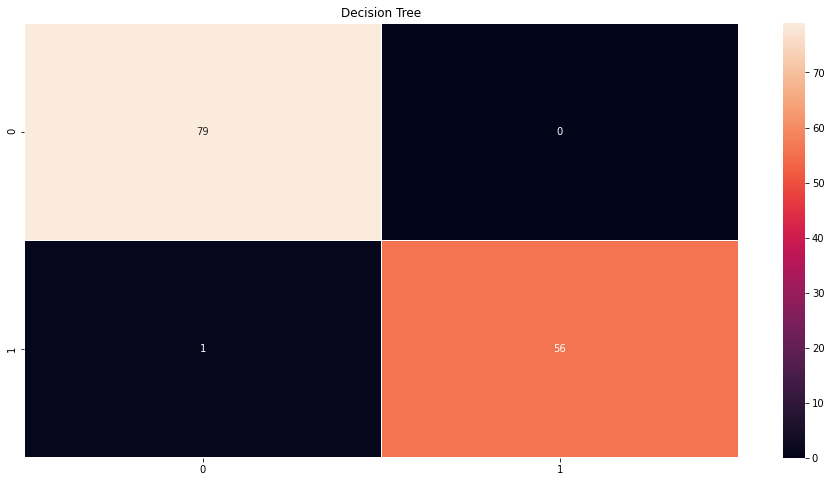

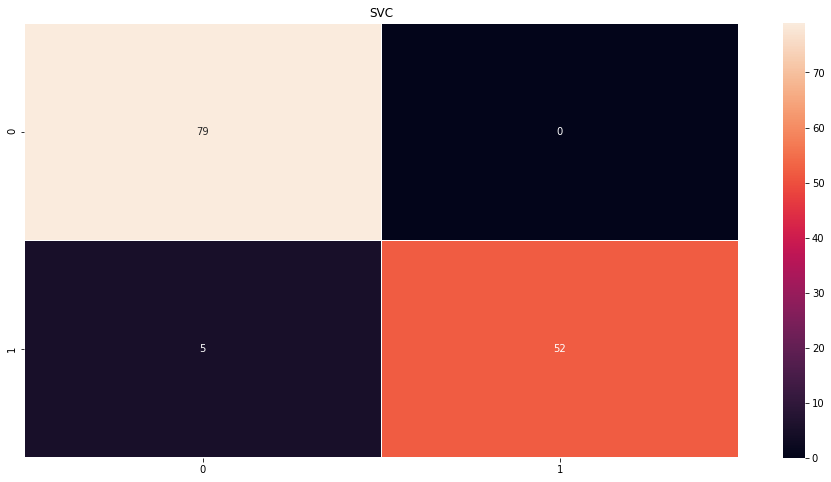

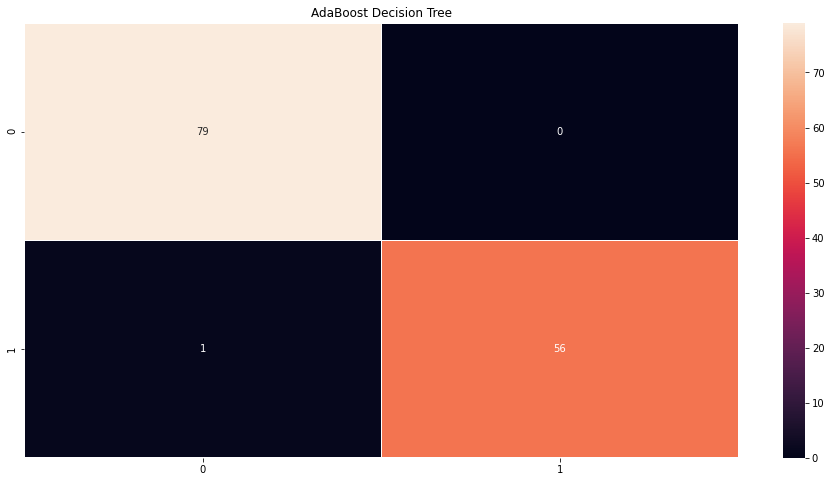

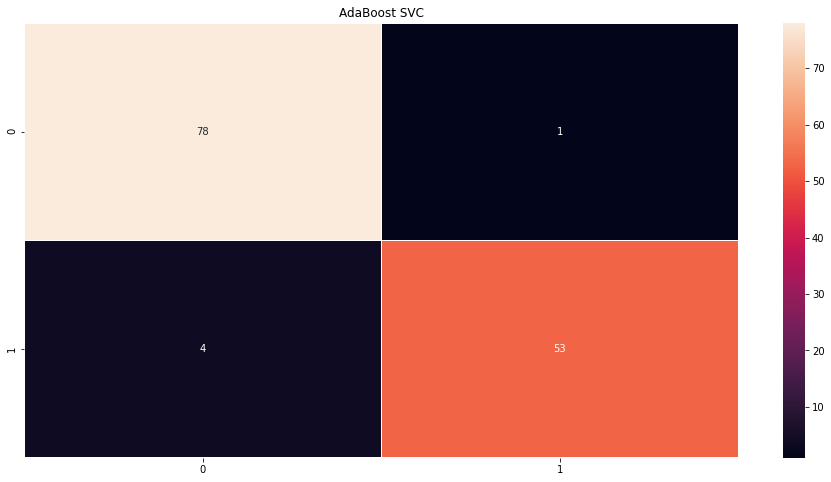

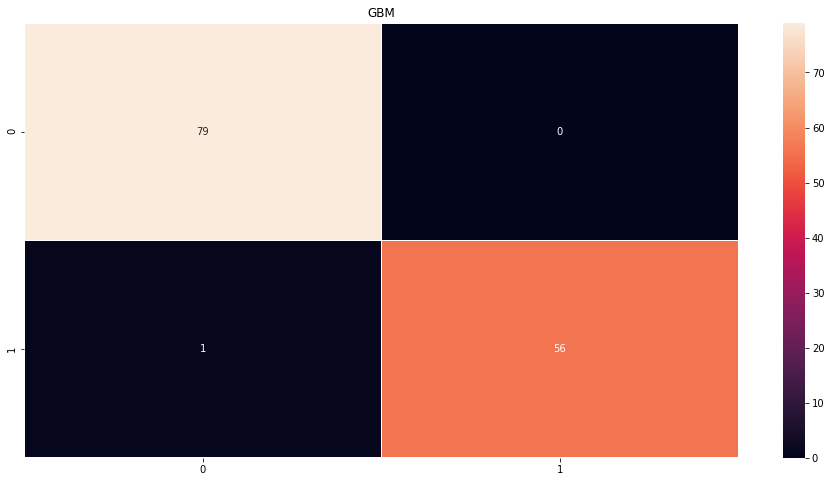

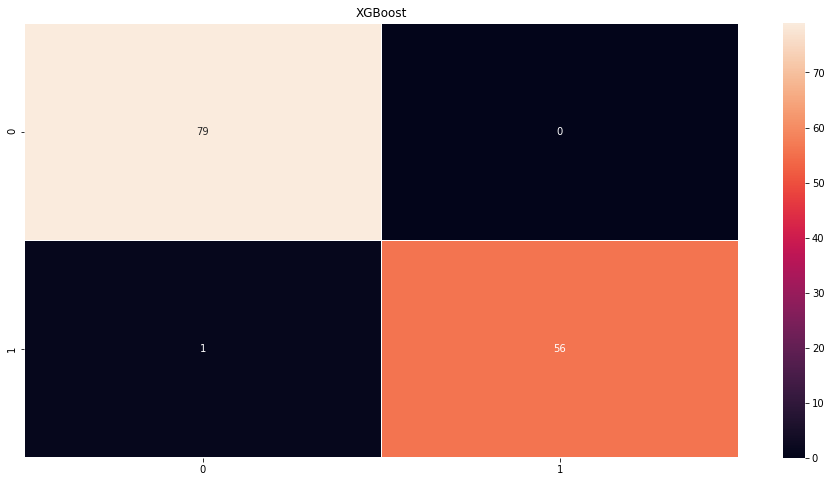

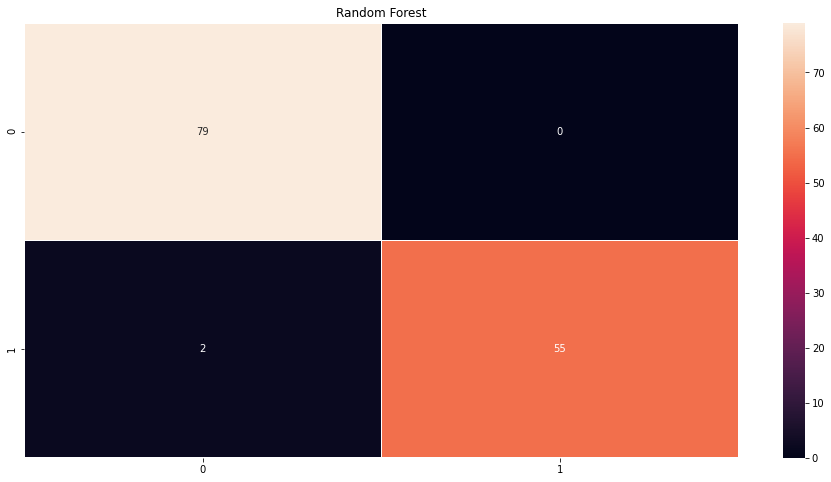

In [43]:
plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree')
plot_confusion_matrix(y_test, y_pred_svc, 'SVC')
plot_confusion_matrix(y_test, y_pred_ada_dt, 'AdaBoost Decision Tree')
plot_confusion_matrix(y_test, y_pred_ada_svc, 'AdaBoost SVC')
plot_confusion_matrix(y_test, y_pred_gbm, 'GBM')
plot_confusion_matrix(y_test, y_pred_xgb, 'XGBoost')
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest')

In [44]:
def print_classification_report(y_test, y_pred, title):
    print(title)
    print(classification_report(y_test, y_pred))
    print(100*'-')

In [45]:
print_classification_report(y_test, y_pred_dt, 'Decision Tree')
print_classification_report(y_test, y_pred_svc, 'SVC')
print_classification_report(y_test, y_pred_ada_dt, 'AdaBoost Decision Tree')
print_classification_report(y_test, y_pred_ada_svc, 'AdaBoost SVC')
print_classification_report(y_test, y_pred_gbm, 'GBM')
print_classification_report(y_test, y_pred_xgb, 'XGBoost')
print_classification_report(y_test, y_pred_rf, 'Random Forest')

Decision Tree
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        79
           1       1.00      0.98      0.99        57

    accuracy                           0.99       136
   macro avg       0.99      0.99      0.99       136
weighted avg       0.99      0.99      0.99       136

----------------------------------------------------------------------------------------------------
SVC
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        79
           1       1.00      0.91      0.95        57

    accuracy                           0.96       136
   macro avg       0.97      0.96      0.96       136
weighted avg       0.97      0.96      0.96       136

----------------------------------------------------------------------------------------------------
AdaBoost Decision Tree
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     

In [46]:
acc = [dt.score(X_test, y_test),
       svc.score(X_test, y_test),
       ada_dt.score(X_test, y_test),
       ada_svc.score(X_test, y_test),
       gbm.score(X_test, y_test),
       xgb.score(X_test, y_test),
       rf.score(X_test, y_test)
]
label = ['DT', 'SVC', 'AdaDT', 'AdaSVC', 'GBM', 'XGB', 'RF']
idx = np.arange(len(label))

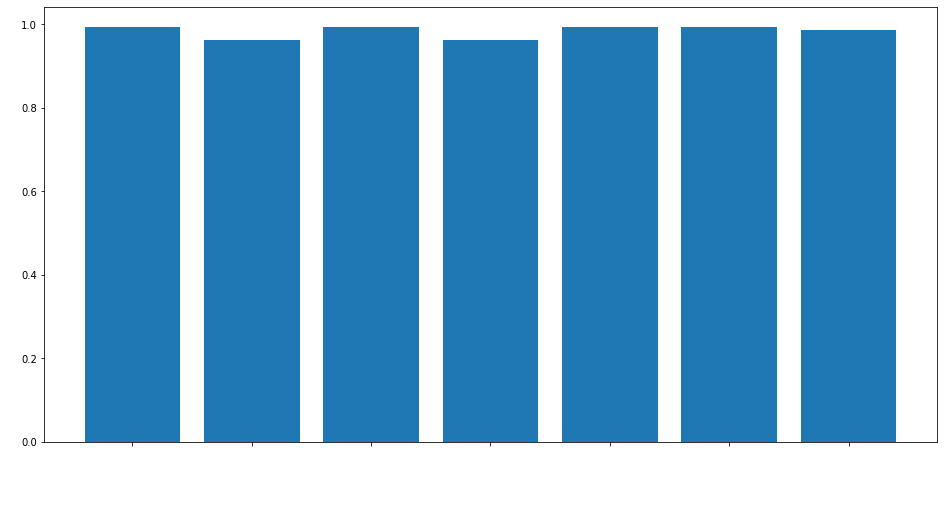

In [47]:
plt.figure(figsize=(16, 8))
plt.bar(idx, acc)
plt.xticks(idx, label, rotation=90, c='w')
plt.xlabel('Model', c='w')
plt.ylabel('Accuracy', c='w')
plt.show()

### Make Predictions

In [48]:
pred = xgb.predict(X_test_pred)

In [49]:
df_pred = pd.DataFrame({
    'prediction': pred
})

from google.colab import files
df_pred.to_csv('ad_pred.csv', index=False)
files.download('ad_pred.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>